# EDA for california house prices

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

housing_bunch = fetch_california_housing(as_frame= True)
type(housing_bunch)


sklearn.utils._bunch.Bunch

### Below is the full data set contaiing features and target:

In [5]:
df = pd.DataFrame(housing_bunch.frame)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000
MedHouseVal,20640.0,2.068558,1.153956,0.149990,1.196000,1.797000,2.647250,5.000010


### Histogram of every feature (data distribution)

array([[<Axes: title={'center': 'MedInc'}>,
        <Axes: title={'center': 'HouseAge'}>,
        <Axes: title={'center': 'AveRooms'}>],
       [<Axes: title={'center': 'AveBedrms'}>,
        <Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'AveOccup'}>],
       [<Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Longitude'}>,
        <Axes: title={'center': 'MedHouseVal'}>]], dtype=object)

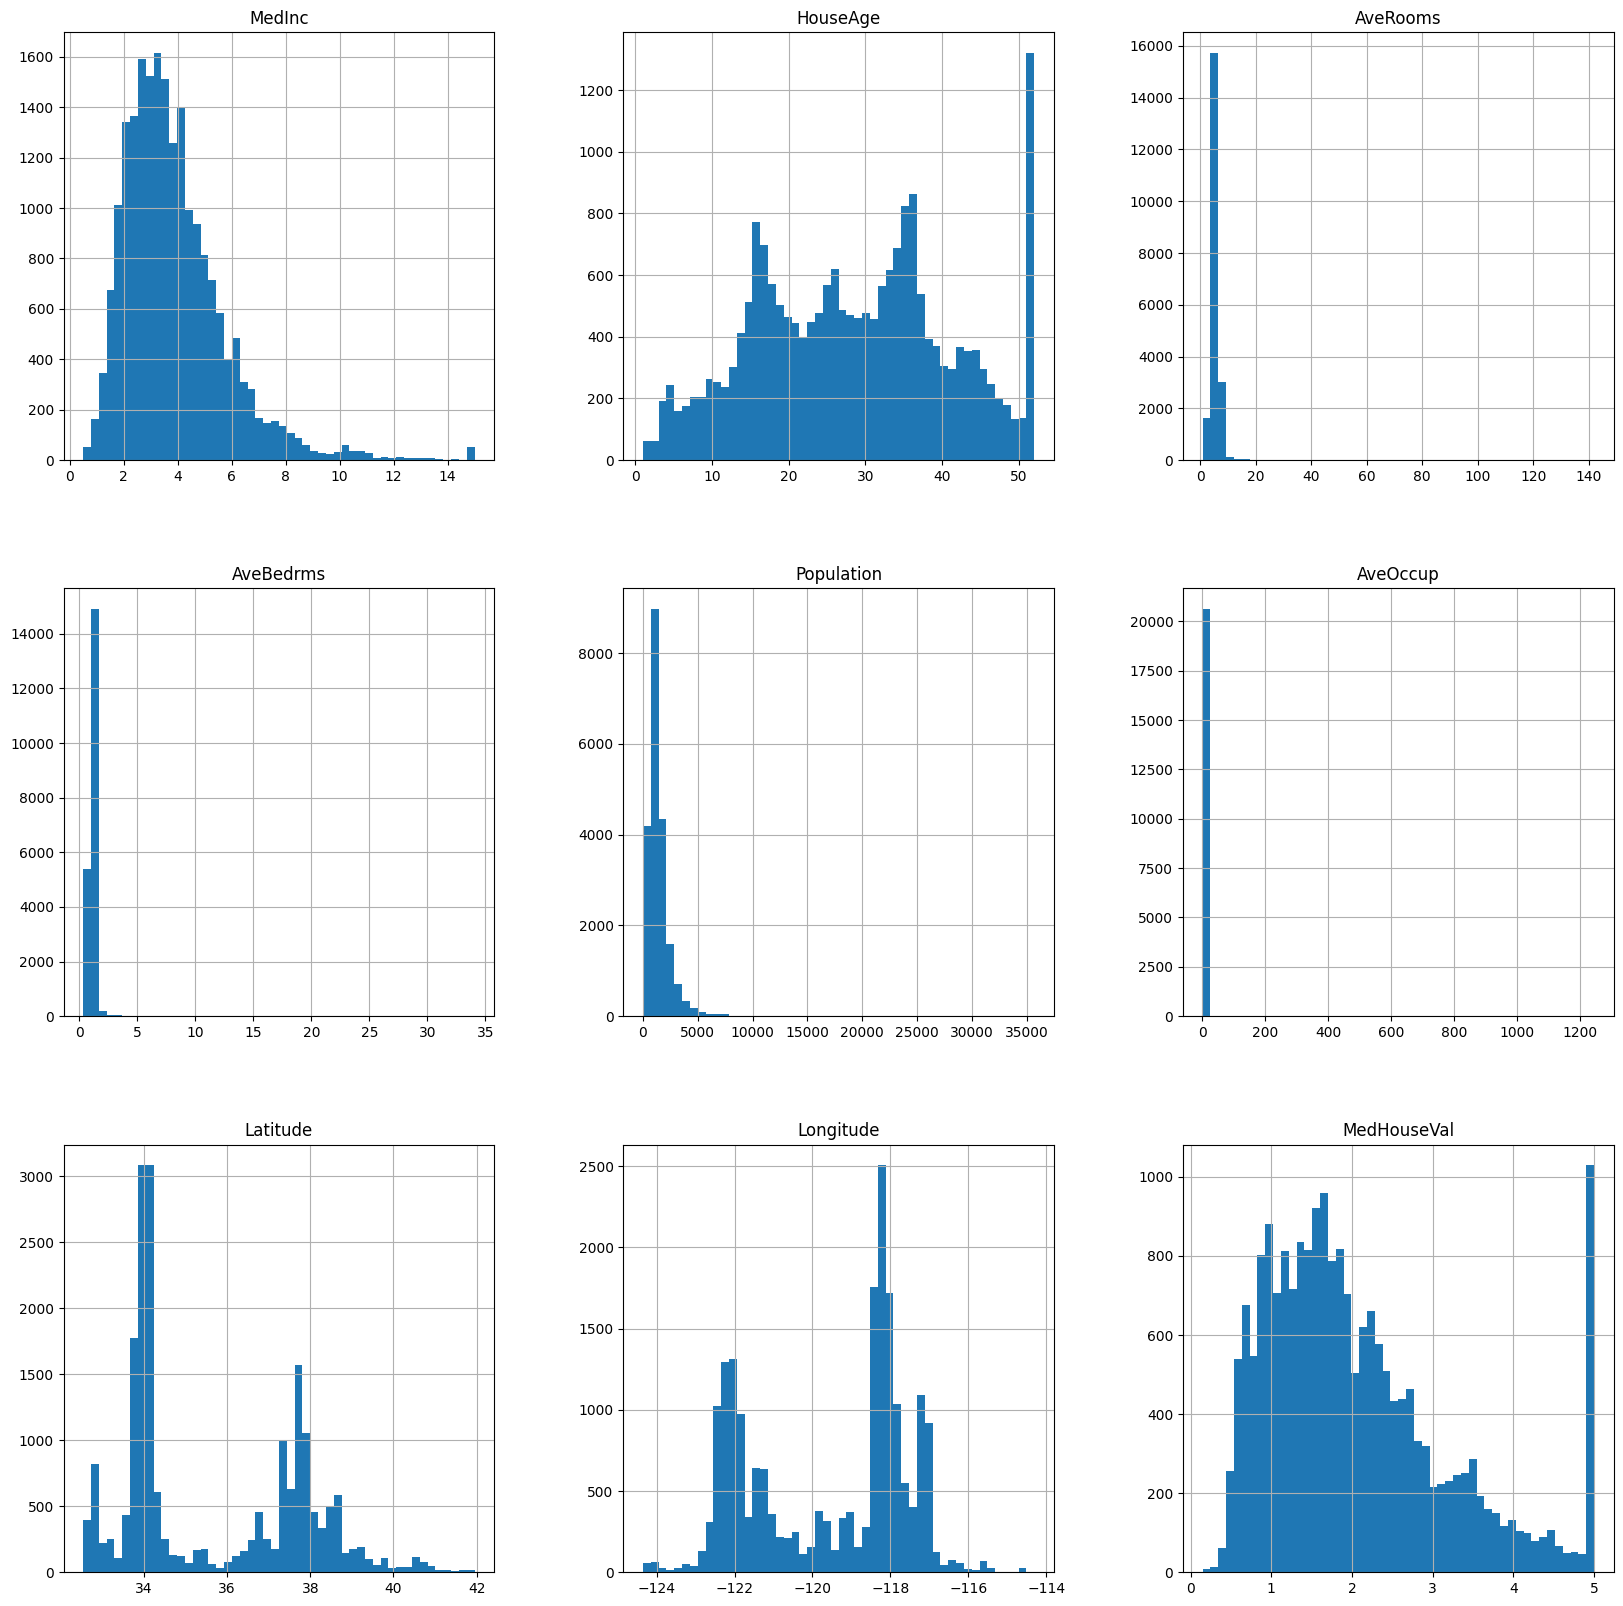

In [6]:
df.hist(bins=50, figsize= (20,20))



### Shape of data (rows and columns), counts, missing values, data types of all features/columns
#### check for missing values, no missing values

In [12]:
print(df.shape)
print("\n")

df.info()

print("\n")

print(df.isna().T)

print("\n")

df.isna().sum()

(20640, 9)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


             0      1      2      3      4      5      6      7      8      \
MedInc       False  False  False  False  False  False  False  False  False   
HouseAge     False  False  False  False  False  False  False  False  False   
AveRooms     False  False  False  False  False  False  False  False  False   
AveBedrms    False  False  False  False  False  False  False  F

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

#### correlation matrix

In [13]:
df.corr(method= 'kendall', numeric_only=True)
df.corr(numeric_only=True)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


#### Scatter plot between Longi and latitude, color coded with house values, revveals that the house prices are significantly higher near the coast:

<Axes: xlabel='Longitude', ylabel='Latitude'>

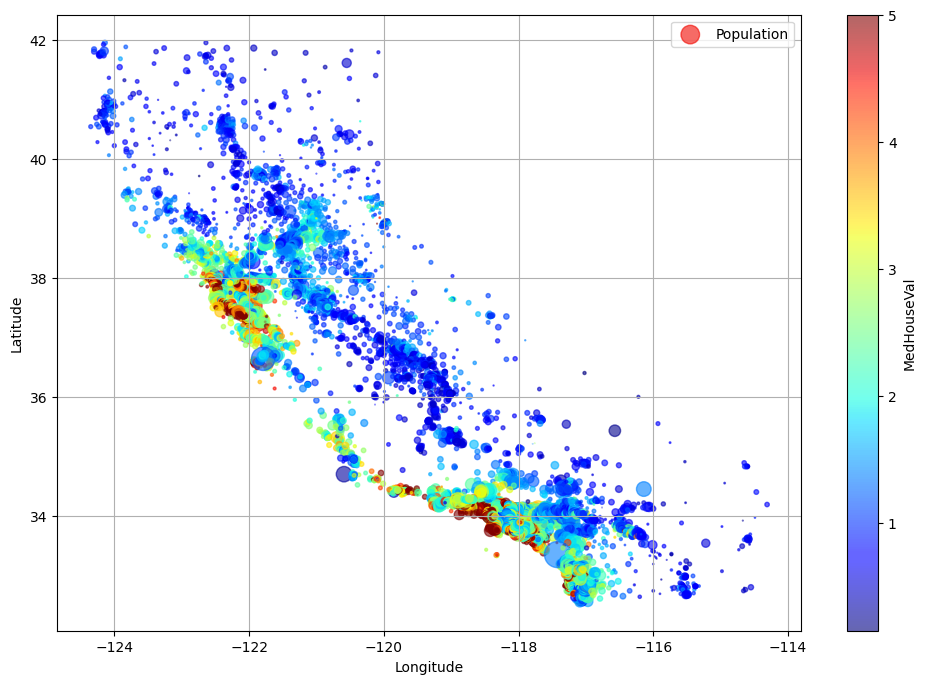

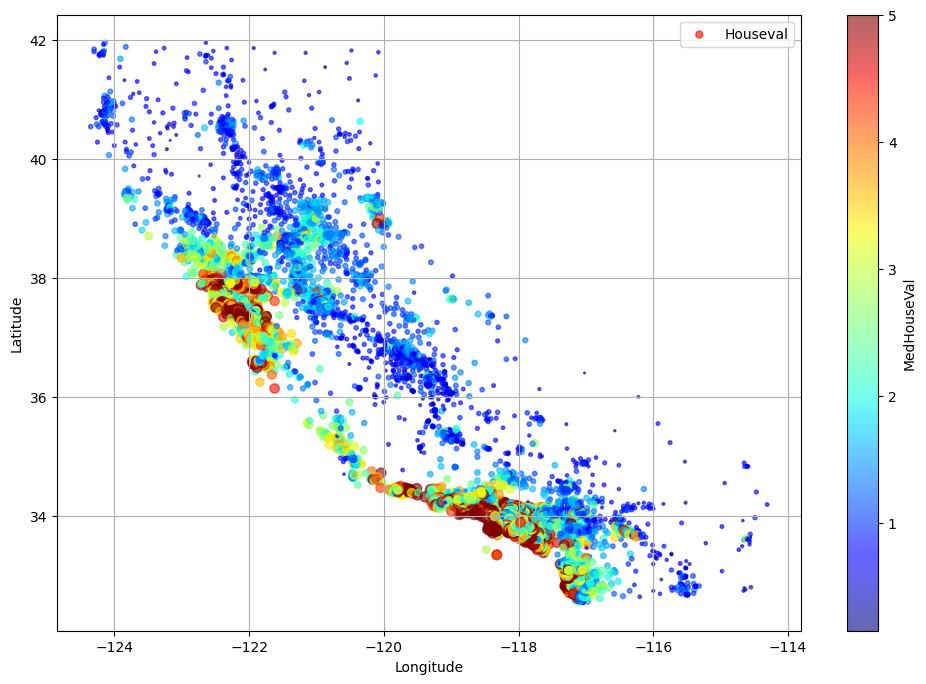

In [16]:

df.plot(
    kind= 'scatter',
    x='Longitude',
    y='Latitude',
    alpha =0.6,
    grid =True,
    s =df['Population']/100, # Size of the dot is decided by the population
    label = 'Population', 
    c = 'MedHouseVal', 
    colormap='jet', 
    figsize=(12,8), 
    legend= True
    )

df.plot(
    kind= 'scatter',
    x='Longitude',
    y='Latitude',
    alpha =0.6,
    grid =True,
    s =df['MedHouseVal']*10, # Size of the dot is decided by the Median House Value
    label = 'Houseval', 
    c = 'MedHouseVal', 
    colormap='jet', 
    figsize=(12,8), 
    legend= True
    )


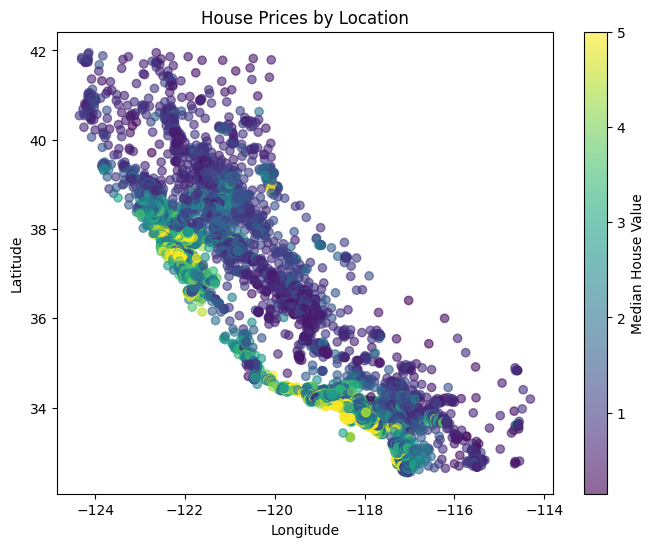

In [4]:

# Scatter plot using matplotlib
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    df["Longitude"],
    df["Latitude"],
    c=df["MedHouseVal"],      # colour coding
    cmap="viridis",           # nice green→blue gradient
    alpha=0.6                 # transparency
)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("House Prices by Location")
plt.colorbar(scatter, label="Median House Value")
plt.show()

Findings (EDA + simple model)

The dataset has 20,640 rows and 8 numeric features plus the target MedHouseVal.

MedInc has the strongest correlation with MedHouseVal, suggesting income is a major driver of house prices.

A geo scatter plot (Longitude vs Latitude) shows higher values clustered near coastal regions, while inland areas are generally lower.

Lowering alpha in scatter plots makes dense regions visually darker, helping reveal population/house density patterns.

A baseline Logistic Regression model can classify “high vs low value” reasonably well, and the coefficients highlight the most influential features.